<a href="https://colab.research.google.com/github/kurokawa5/ML4DS/blob/main/02_linear_regression/02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
%matplotlib inline
import pylab as plt

data = np.loadtxt('/content/drive/MyDrive/05_workspace/09_ml4ds/02_linear_regression/olympic100m.txt', delimiter=',') # make sure olympic100m.txt is in the right folder
x = data[:,0][:,None] # make x a matrix
t = data[:,1][:,None] # make t a column vector 

In [20]:
x.shape

(27, 1)

In [24]:
t.shape

(27, 1)

In [23]:
def transform(x):
    return (x-np.mean(x))/np.std(x) 

Text(0, 0.5, 'Time (seconds)')

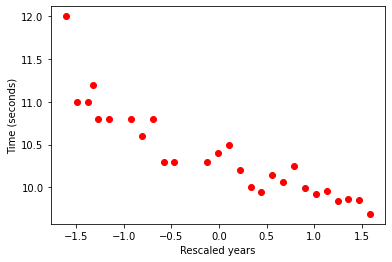

In [5]:
# Test both options
x = transform(x) # rescale x here
plt.plot(x, t, 'ro')
plt.xlabel('Rescaled years')
plt.ylabel('Time (seconds)')

In [13]:
def make_polynomial(x, maxorder): # The np.hstack function can be very helpful
    X = np.ones_like(x) 
    for i in range(1,maxorder+1):
        X = np.hstack((X,x**i))
    return(X) 

In [14]:
poly_order = 9
X_train = make_polynomial(x, poly_order) 

In [17]:
X_train.shape

(27, 10)

In [18]:
X_train

array([[ 1.00000000e+00, -1.61025838e+00,  2.59293204e+00,
        -4.17529054e+00,  6.72329658e+00, -1.08262446e+01,
         1.74330511e+01, -2.80717166e+01,  4.52027169e+01,
        -7.27880535e+01],
       [ 1.00000000e+00, -1.49599563e+00,  2.23800292e+00,
        -3.34804258e+00,  5.00865707e+00, -7.49292907e+00,
         1.12093891e+01, -1.67691971e+01,  2.50866456e+01,
        -3.75295122e+01],
       [ 1.00000000e+00, -1.38173288e+00,  1.90918575e+00,
        -2.63798472e+00,  3.64499022e+00, -5.03640283e+00,
         6.95896338e+00, -9.61542850e+00,  1.32859537e+01,
        -1.83576390e+01],
       [ 1.00000000e+00, -1.32460150e+00,  1.75456914e+00,
        -2.32410493e+00,  3.07851288e+00, -4.07780279e+00,
         5.40146371e+00, -7.15478695e+00,  9.47724156e+00,
        -1.25535684e+01],
       [ 1.00000000e+00, -1.26747013e+00,  1.60648053e+00,
        -2.03616608e+00,  2.58077969e+00, -3.27106116e+00,
         4.14597231e+00, -5.25489606e+00,  6.66042379e+00,
        -8.

In [25]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression().fit(X_train, t) # Fit a linear model
print('loss at order ', poly_order, ' :', np.mean((t-poly_reg.predict(X_train))**2 ) )

loss at order  9  : 0.015317351464103028


(100, 10) (100, 1)


Text(0, 0.5, 'Time (seconds)')

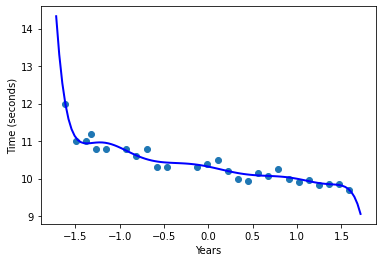

In [26]:
#temp = []
x_test = np.linspace(1880,2020, 100)[:,None] # test data
x_test = transform(x_test) # do the same rescaling to the test data 
X_test = make_polynomial(x_test, poly_order) # construct the polynomial matrix for test data
f_test = poly_reg.predict(X_test)

print(np.shape(X_test), np.shape(f_test))
plt.plot(x_test,f_test,'b-',linewidth=2) # plot the fitted data
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis

(100, 1) [[-1.71481604]
 [-1.68017329]
 [-1.64553055]
 [-1.6108878 ]
 [-1.57624505]
 [-1.5416023 ]
 [-1.50695955]
 [-1.4723168 ]
 [-1.43767406]
 [-1.40303131]
 [-1.36838856]
 [-1.33374581]
 [-1.29910306]
 [-1.26446031]
 [-1.22981757]
 [-1.19517482]
 [-1.16053207]
 [-1.12588932]
 [-1.09124657]
 [-1.05660382]
 [-1.02196108]
 [-0.98731833]
 [-0.95267558]
 [-0.91803283]
 [-0.88339008]
 [-0.84874733]
 [-0.81410459]
 [-0.77946184]
 [-0.74481909]
 [-0.71017634]
 [-0.67553359]
 [-0.64089084]
 [-0.6062481 ]
 [-0.57160535]
 [-0.5369626 ]
 [-0.50231985]
 [-0.4676771 ]
 [-0.43303435]
 [-0.39839161]
 [-0.36374886]
 [-0.32910611]
 [-0.29446336]
 [-0.25982061]
 [-0.22517786]
 [-0.19053512]
 [-0.15589237]
 [-0.12124962]
 [-0.08660687]
 [-0.05196412]
 [-0.01732137]
 [ 0.01732137]
 [ 0.05196412]
 [ 0.08660687]
 [ 0.12124962]
 [ 0.15589237]
 [ 0.19053512]
 [ 0.22517786]
 [ 0.25982061]
 [ 0.29446336]
 [ 0.32910611]
 [ 0.36374886]
 [ 0.39839161]
 [ 0.43303435]
 [ 0.4676771 ]
 [ 0.50231985]
 [ 0.5369626 ]
 

Text(0, 0.5, 'Time (seconds)')

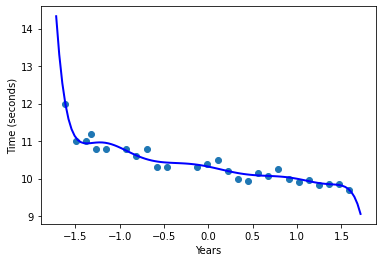

In [27]:
x_test = np.linspace(1880,2020, 100)[:,None] # test data
x_test = transform(x_test) # do the same rescaling to the test data 
X_test = make_polynomial(x_test, poly_order) # construct the polynomial matrix for test data
f_test = poly_reg.predict(X_test)
plt.plot(x_test,f_test,'b-',linewidth=2) # plot the fitted data
print(np.shape(x_test),x_test)
print(np.shape(f_test),f_test)
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis